## Read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12, 6]

import pickle
from utils.helpers import create_df, find_skills_frequency

In [2]:
pkl_file_name = 'data-scientist_new-york'

In [3]:
pkl_file_path = f'data/{pkl_file_name}.pickle'
file_object = open(pkl_file_path, 'rb')
results = pickle.load(file_object)
file_object.close()

In [4]:
results_df = create_df(results)

results_df.head()

221 duplicates found.
dataframe created.


,company,description,location,salary,title
1,Tapad,"Small Teams; Big Data\n\nAt Tapad, we look for...","New York, NY",$ 107 mil-$ 176 mil (Est. de Glassdoor),Data Scientist
2,Codecademy,"Hello, World! Codecademy has helped tens of mi...","New York, NY",$ 97 mil-$ 160 mil (Est. de Glassdoor),"Senior Data Scientist, Analytics & Inference"
3,Amneal Pharmaceuticals,The Scientist III develops and executes formul...,"Piscataway, NJ",$ 27 mil-$ 85 mil (Est. de Glassdoor),"Scientist III, Pharma R & D"
4,Regeneron,The successful candidate will play an integral...,"Tarrytown, NY",$ 47 mil-$ 103 mil (Est. de Glassdoor),Associate Scientist
5,Bloomberg,What is Enterprise Data?\n\nBloomberg's Enterp...,"New York, NY",$ 93 mil-$ 150 mil (Est. de Glassdoor),Data Science Solutions Architect


In [5]:
results_df.loc[1, 'description']

"Small Teams; Big Data\n\nAt Tapad, we look for individuals who are motivated by complex and challenging work. We want to work with people who share compelling solutions to those challenges, solutions informed by their unique experiences, passions, and expertise.\n\nWe are looking for a Data Scientist to research and develop state-of-the-art algorithms and help build models to support Tapad's mission to create the world's largest identity graph. As part of Tapad's Data Science team, you will leverage cutting edge technologies and techniques to impact our core intellectual property and commercial products. This includes, but is not limited to, machine learning, deep learning, NLP, Google Cloud AI Platform, BigQuery, TensorFlow Extended, and Kubeflow Pipelines.\n\nTapad Data Scientists are responsible for turning new ideas into innovative products. You will work closely with our technologists to actualize your research and solutions into concrete commercial products and services. You wil

In [6]:
results_df.to_csv(f'out/csv/{pkl_file_name}.csv', index=None)

In [7]:
skills_df = find_skills_frequency(results_df).sort_values(by='NumPostings', ascending=False)
skills_df.head(10)

,Term,NumPostings
1,Python,62.389381
44,Statistics,43.510324
0,R,39.380531
45,Mathematics,29.056047
42,PhD,21.976401
40,Bachelor,21.238938
41,Master,20.648968
13,Tableau,19.469027
51,Spark,18.289086
12,Excel,16.519174


In [8]:
skills_df.to_csv(f'out/skills/{pkl_file_name}_skills.csv', index=None)

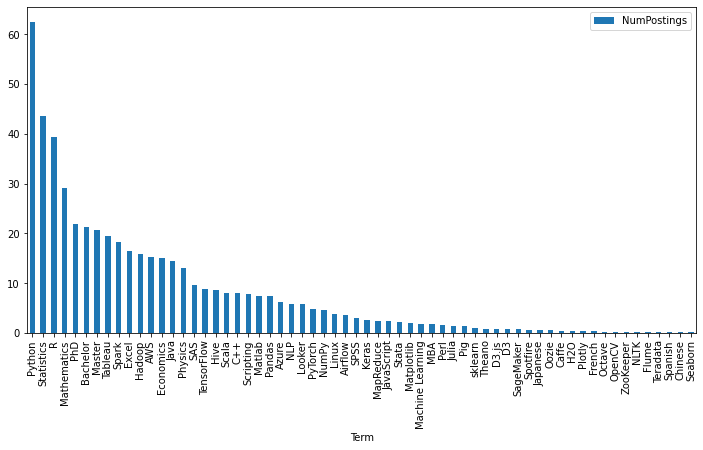

In [9]:
skills_df.plot(x='Term', y='NumPostings', kind='bar')
plt.show()

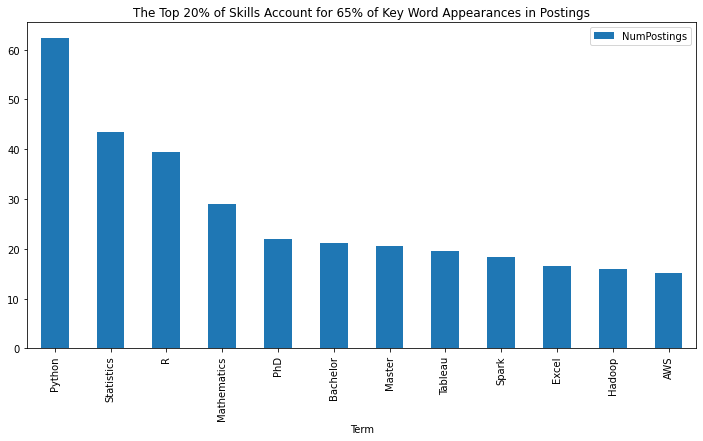

In [10]:
top_skills = int(len(skills_df)*.2)
num_postings_top_skills = skills_df[:top_skills].NumPostings.sum() / skills_df.NumPostings.sum()

title = "The Top 20% of Skills Account for " + str(round(num_postings_top_skills*100)) + "% of Key Word Appearances in Postings"
skills_df[:top_skills].plot(x='Term', y='NumPostings', kind='bar', title=title)
plt.show()